In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [4]:
df = pd.DataFrame({'Strain' :(['0.003','0.006','0.009','0.012','0.014','0.017','0.02','0.035','0.052','0.079','0.124','0.167','0.212','0.264','0.3']),'Stress(Mpa)':(['6.2946','12.5892','18.8838','25.1784','29.3787','35.6733','39.0078','52.4043','62.3493','66.7836','69.9543','70.317','69.7086','67.275','64.8414'])})

In [5]:
df = df.astype(float)

In [6]:
df

,Strain,Stress(Mpa)
0,0.003,6.2946
1,0.006,12.5892
2,0.009,18.8838
3,0.012,25.1784
4,0.014,29.3787
5,0.017,35.6733
6,0.020,39.0078
7,0.035,52.4043
8,0.052,62.3493
9,0.079,66.7836


In [7]:
df.dtypes

Strain         float64
Stress(Mpa)    float64
dtype: object

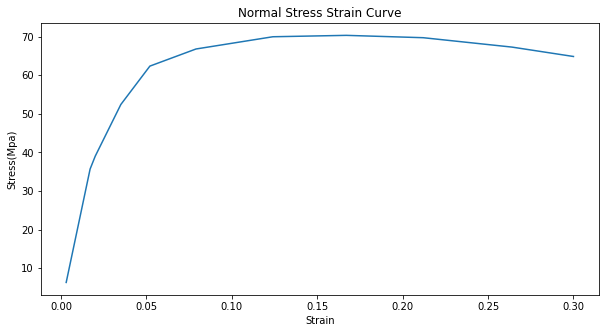

In [8]:
fig, ax=plt.subplots(figsize=(10,5))
sns.lineplot(data=df, x='Strain', y='Stress(Mpa)',ax=ax)
ax.set_title('Normal Stress Strain Curve')
plt.show()

In [9]:
dy = df[df['Stress(Mpa)']<= 38]

In [10]:
dy.head()

,Strain,Stress(Mpa)
0,0.003,6.2946
1,0.006,12.5892
2,0.009,18.8838
3,0.012,25.1784
4,0.014,29.3787


In [11]:
xs = np.array(dy['Strain'])

In [12]:
ys = np.array(dy['Stress(Mpa)'])

In [13]:
xf = np.array(df['Strain'])

In [14]:
yf = np.array(df['Stress(Mpa)'])

# Best fit of the scattered data below given Mpa value in dy

In [15]:
res = stats.linregress(xs, ys)

In [16]:
res

LinregressResult(slope=2098.508529048207, intercept=-0.001836711990108597, rvalue=0.9999999937305832, pvalue=5.895837970895556e-17, stderr=0.11749227522898589, intercept_stderr=0.001317974976213841)

In [17]:
df['0.2% Offset Strain'] = (df['Strain']+0.002)

In [18]:
df['0.2% Offset Stress']= (df['Strain'])*res.slope

In [19]:
df_O = df[df['0.2% Offset Stress']<=60]

In [20]:
df_O

,Strain,Stress(Mpa),0.2% Offset Strain,0.2% Offset Stress
0,0.003,6.2946,0.005,6.295526
1,0.006,12.5892,0.008,12.591051
2,0.009,18.8838,0.011,18.886577
3,0.012,25.1784,0.014,25.182102
4,0.014,29.3787,0.016,29.379119
5,0.017,35.6733,0.019,35.674645
6,0.020,39.0078,0.022,41.970171


In [21]:
x_off = df_O['0.2% Offset Strain']

In [22]:
y_off = df_O['0.2% Offset Stress']

In [23]:
res_off = stats.linregress(x_off, y_off)

In [24]:
res_off

LinregressResult(slope=2098.508529048207, intercept=-4.19701705809641, rvalue=1.0, pvalue=1.9206748078018256e-50, stderr=0.0, intercept_stderr=0.0)

In [25]:
df.head()

,Strain,Stress(Mpa),0.2% Offset Strain,0.2% Offset Stress
0,0.003,6.2946,0.005,6.295526
1,0.006,12.5892,0.008,12.591051
2,0.009,18.8838,0.011,18.886577
3,0.012,25.1784,0.014,25.182102
4,0.014,29.3787,0.016,29.379119


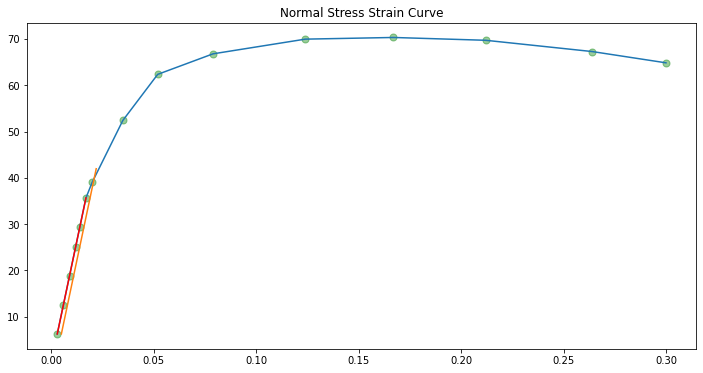

In [26]:
fig, ax = plt.subplots(figsize=(12,6))

plt.plot(df['Strain'], df['Stress(Mpa)'])
# Scattered ploting of the original data
plt.scatter(df['Strain'], df['Stress(Mpa)'], alpha =0.4, color='green', s=50)

# best fit using scipy stats of regression method
plt.plot(dy['Strain'], (res.slope)*(xs)+ res.intercept, 'r', label='bestfit line')
ax.set_title('Normal Stress Strain Curve')

plt.plot(df_O['0.2% Offset Strain'], df_O['0.2% Offset Stress'])

In [27]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [28]:
p1 = figure(title='Yield Stress Determination', width =800, plot_height= 500)

p1.grid.grid_line_alpha = 1
p1.xaxis.axis_label = 'Strain in mm'
p1.yaxis.axis_label = 'Stress In Mpa'

p1.line(df['Strain'], df['Stress(Mpa)'], color='blue', legend_label='laboratory test result')
p1.scatter(df['Strain'], df['Stress(Mpa)'], size=5, alpha =0.80, fill_color= 'yellow', line_color='black')



p1.line(dy['Strain'], (res.slope)*(xs)+ res.intercept, color='red', legend_label ='Best Fit Curve')
p1.line(df_O['0.2% Offset Strain'], df_O['0.2% Offset Stress'], color='green', legend_label='0.2% OffSet Curve')
p1.legend.location ='bottom_right'
show(p1)

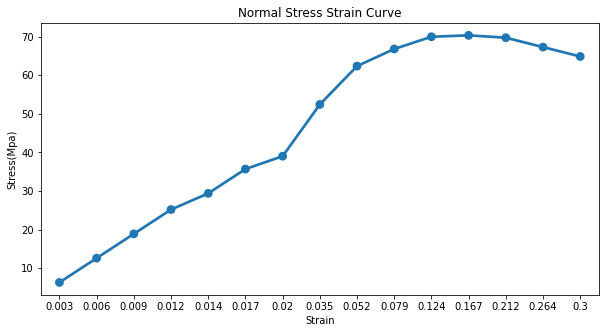

In [264]:
fig, ax=plt.subplots(figsize=(10,5))
sns.pointplot(data=df, x='Strain', y='Stress(Mpa)',ax=ax)
ax.set_title('Normal Stress Strain Curve')
plt.show()